In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras


In [4]:
df = pd.read_csv('wine-reviews.csv', usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])
df.columns

Index(['country', 'description', 'points', 'price', 'variety', 'winery'], dtype='object')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   variety      129970 non-null  object 
 5   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.9+ MB


,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [6]:
df = df.dropna(subset=['country', 'price', 'variety'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   variety      120915 non-null  object 
 5   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ MB


,country,description,points,price,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


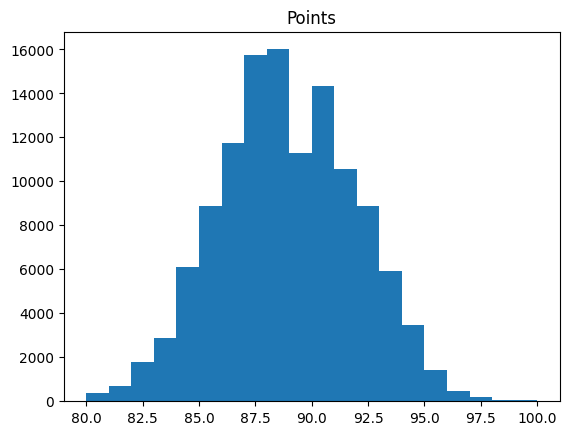

In [7]:
plt.hist(df.points, bins=20)
plt.title('Points')
plt.show()

In [8]:
df.loc[:, 'label'] = (df.points >= 90).astype(int)
df = df[['description', 'label']]

In [9]:
train, temp = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
valid, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp['label'])

print(f'Train size: {len(train)}, Valid size: {len(valid)}, Test size: {len(test)}')

Train size: 96732, Valid size: 12091, Test size: 12092


In [10]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df.description
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [11]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(valid)
test_data = df_to_dataset(test)

In [12]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'This is a simple wine with candied raspberry, mint and toasted oak notes.',
        b'This is lightly perfumed with green melon, lychee and papaya aromas. The palate is middle of the road in terms of acidity and snap. Flavors of lychee, peach and nectarine are typical of the variety, while the finish is plump and smooth.',
        b"Aromas of acacia, nut and yellow stone fruit lead the nose. It's ripe and round, offering dried apricot, bread crust, golden apple and a note of bitter almond.",
        ...,
        b'A smoothly textured wine that shows red-berry flavors, with very soft tannins along with a farmyard character. It feels ripe and fruit; a fine barbecue wine.',
        b"The highly anticipated best barrel blend from this pioneering Syrah producer offers bright blueberry and black currant aromas, enlivened by white pepper, lavender, milk chocolate and caramel. Violet floral notes power the attack, followed by waves of 

# Embedding + Model
Token based text embedding trained on English Google News 7B corpus.


Text embedding based on feed-forward Neural-Net Language Models[1] with pre-built OOV. Maps from text to 50-dimensional embedding vectors.

https://www.kaggle.com/models/google/nnlm/TensorFlow2/en-dim50/1

In [13]:
embedding = "https://www.kaggle.com/models/google/nnlm/TensorFlow2/en-dim50/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [14]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.23137371, -0.20339015, -0.1906708 , ..., -0.07177642,
        -0.13550611,  0.04232778],
       [ 0.71673423, -0.03922651, -0.19491354, ..., -0.03952412,
        -0.24940006,  0.10467947],
       [ 0.21299392, -0.06340624,  0.0822983 , ..., -0.01306313,
         0.04389952, -0.06817035],
       ...,
       [ 0.3074355 ,  0.02877879,  0.14491674, ...,  0.03186837,
        -0.24635105, -0.15860802],
       [ 0.37917128, -0.0110845 ,  0.08847321, ..., -0.04282133,
         0.02597227,  0.09913588],
       [ 0.31364903, -0.06586177,  0.04932505, ...,  0.04441602,
        -0.15712695,  0.16478631]], dtype=float32)>

In [15]:
model = tf_keras.Sequential()
model.add(hub_layer)
model.add(tf_keras.layers.Dense(16, activation='relu'))
model.add(tf_keras.layers.Dropout(0.4))
model.add(tf_keras.layers.Dense(16, activation='relu'))
model.add(tf_keras.layers.Dropout(0.4))
model.add(tf_keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48191705 (183.84 MB)
Trainable params: 481

In [16]:
model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=0.001),
              loss=tf_keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [17]:
model.evaluate(train_data)

95/95 [==============================] - 2s 9ms/step - loss: 0.7316 - accuracy: 0.3753


[0.731569230556488, 0.37526360154151917]

In [18]:
model.evaluate(valid_data)

12/12 [==============================] - 0s 8ms/step - loss: 0.7322 - accuracy: 0.3752


[0.7321891784667969, 0.3752377927303314]

In [19]:
model.fit(train_data, epochs=5, validation_data=valid_data)
model.evaluate(test_data)

Epoch 1/5
95/95 [==============================] - 17s 145ms/step - loss: 0.6649 - accuracy: 0.5975 - val_loss: 0.5881 - val_accuracy: 0.7064
Epoch 2/5
95/95 [==============================] - 11s 113ms/step - loss: 0.5104 - accuracy: 0.7555 - val_loss: 0.4086 - val_accuracy: 0.8124
Epoch 3/5
95/95 [==============================] - 9s 90ms/step - loss: 0.4132 - accuracy: 0.8222 - val_loss: 0.3785 - val_accuracy: 0.8232
Epoch 4/5
95/95 [==============================] - 6s 61ms/step - loss: 0.3718 - accuracy: 0.8440 - val_loss: 0.3693 - val_accuracy: 0.8280
Epoch 5/5
12/12 [==============================] - 0s 9ms/step - loss: 0.3621 - accuracy: 0.8387


[0.36211490631103516, 0.838736355304718]

# LSTM

In [20]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [21]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'to', 'it', 'its', 'on', 'fruit', 'aromas',
       'palate', 'finish'], dtype='<U17')

In [22]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [24]:
model.evaluate(train_data)
model.evaluate(valid_data)

95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4284 - loss: 0.6936
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4272 - loss: 0.6936


[0.6936339735984802, 0.4266810119152069]

In [25]:
model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6536 - loss: 0.6183 - val_accuracy: 0.8296 - val_loss: 0.3695
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8328 - loss: 0.3763 - val_accuracy: 0.8402 - val_loss: 0.3448
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8451 - loss: 0.3470 - val_accuracy: 0.8401 - val_loss: 0.3399
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8478 - loss: 0.3425 - val_accuracy: 0.8438 - val_loss: 0.3395
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8516 - loss: 0.3330 - val_accuracy: 0.8391 - val_loss: 0.3426


In [26]:
model.evaluate(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8514 - loss: 0.3313


[0.33476775884628296, 0.8464273810386658]